# Heart Diseas Analysis

<b> Oleh </b> : Rizki Latifah Harviani 

<b> Data </b> : Heart Diseas (source : https://www.kaggle.com/johnsmith88/heart-disease-dataset)

### Introduction

Penyakit jantung adalah salah satu penyakit yang cukup banyak dialami oleh masyarakat. Hal tersebut tentu menjadi suatu hal yang dianggap menakutkan. Sebagai upaya pencegahan, maka diperlukan suatu analisis mengenai gejala-gejala terkait penyakit jantung tersebut.

Dari project ini, pertanyaan yang akan dijawab adalah :
1. Apakah ada dependency antar sympthom yang menyebabkan penyakit jantung?
2. Apakah model klasifikasi dapat diterapkan untuk memprediksi penyakit jantung?

### Data Description

Pada project ini, dataset yang digunakan merupakan data yang berisikan beberapa variabel/features yang berpengaruh terhadap kondisi target apakah memiliki penyakit jantung atau tidak. Dataset ini memuat hasil beberapa rangkaian test pemeriksaan terkait penyakit jantung, seperti tekanan darah, pemeriksaan lab untuk kadar kolesterol dan gula darah, pemeriksaan ECG/EKG saat berbaring dan exercise, serta scan Thallium. Dataset ini terdiri dari 14 kolom, dimana kolom 1-13 berisikan variabel mengenai <i> symthoms </i> terkait penyakit jantung, sedangkan kolom 14 berisikan target yang merupakan label bahwa pasien tersebut menderita penyakit jantung atau tidak.

Berikut ini adalah penjelasan mengenai atribut yang terdapat dalam dataset :

<b> 1. age </b> : Usia pasien (satuan: Tahun)

<b> 2. sex </b> : Jenis kelamin pasien
- 1 = Laki-laki
- 0 = Perempuan

<b> 3. cp </b> : chest pain type. tipe sakit/nyeri dada
- 0 = Typical Angina
- 1 = Atypical Angina
- 2 = Non-Anginal
- 3 = Asymptomatic

<b> 4. trestbps </b> : resting blood pressure. tekanan darah saat keadaan berbaring. (satuan: mmHg)

<b> 5. chol </b> : choleterol. kadar kolesterol darah. (satuan: mg/dl)

<b> 6. fbs </b> : fasting blood sugar. kadar gula darah saat keadaan berpuasa. 
- 1 = lebih dari 120 mg/dl
- 0 = kurang dari sama dengan 120 mg/dl

<b> 7. restecg </b> : resting electrocardiography result. hasil ECG saat keadaan berbaring
- 0: normal 
- 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
- 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

<b> 8. thalach </b> : maximum heart rate achieved. kecepatan maksimum detak jantung (satuan: BPM) 

<b> 9. exang </b> : exercise induced angina
- 1 = sesak saat berolahraga
- 0 = tidak sesak saat berolahraga

<b> 10. oldpeak </b> : ST depression induced by exercise relative to rest. Perubahan grafik Segmen ST saat exercise dibandingkan dengan Segmen ST saat berbaring.

<b> 11. slope </b> : the slope of the peak exercise ST segment. posisi slope pada ST Segmen saat puncak exercise.
- 1: upsloping 
- 2: flat 
- 3: downsloping 

<b> 12. ca </b> : number of major vessels colored by flouroscopy. pembuluh darah yang diuji flouroscopy, tipe pembuluh darah : 0,1,2,3

<b> 13. thal </b> : hasil scan thallium pada jantung
- 1 = normal (hasil scan tidak menunjukkan adanya cold spots)
- 2 = fixed defect (hasil scan menujukkan cold spots pada saat berbaring atau exercise)
- 3 = reversible defect (hasil scan menujukkan cold spots pada saat exercise saja)

<b> 14. target </b> : kondisi pasien
- 1 = heart disease
- 0 = no heart disease

### Data Loading

Dataset tersebut memiliki format <b> .csv </b> yang disimpan dalam bucket di <b> Amazon S3 </b>. Berikut ini adalah code untuk melakukan read data ke dari Amazon S3 ke Jupyter Notebook di <b> Amazon Sagemaker </b> :

In [1]:
#Load data from Amazon S3
import s3fs
s3 = s3fs.S3FileSystem()
s3.ls('mydtsbucket')

import pandas as pd

with s3.open('mydtsbucket/heart.csv','rb') as f:
    data = pd.read_csv(f)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Selanjutnya kita perlu melihat <b> summary  data, seperti: banyaknya data (baris), tipe data, dan keberadaan nilai null dalam data </b>. Hal ini dilakukan agar kita mengetahui apakah diperlukan data cleaning terlebih dahulu sebelum kita melakukan pemrosesan pada data.

In [2]:
#get info on all the null entries 
print("----- Data Information -----\n")
data.info()

----- Data Information -----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Dari hasil summary di atas, terlihat bahwa <b> tidak ada nilai null </b> di dalam dataset, sehingga kita tidak perlu melakukan data cleaning untuk menghilangkan nilai null.

### 1. Data Exploration : Scatter Plot untuk masing-masing features

Sebelum melakukan analisis lebih lanjut, kita perlu mengetahui persebaran dan korelasi antar data yang ada di dalam dataset. Persebaran dan korelasi antar dua variabel dalam data dapat divisualisasikan menggunakan scatter plot.

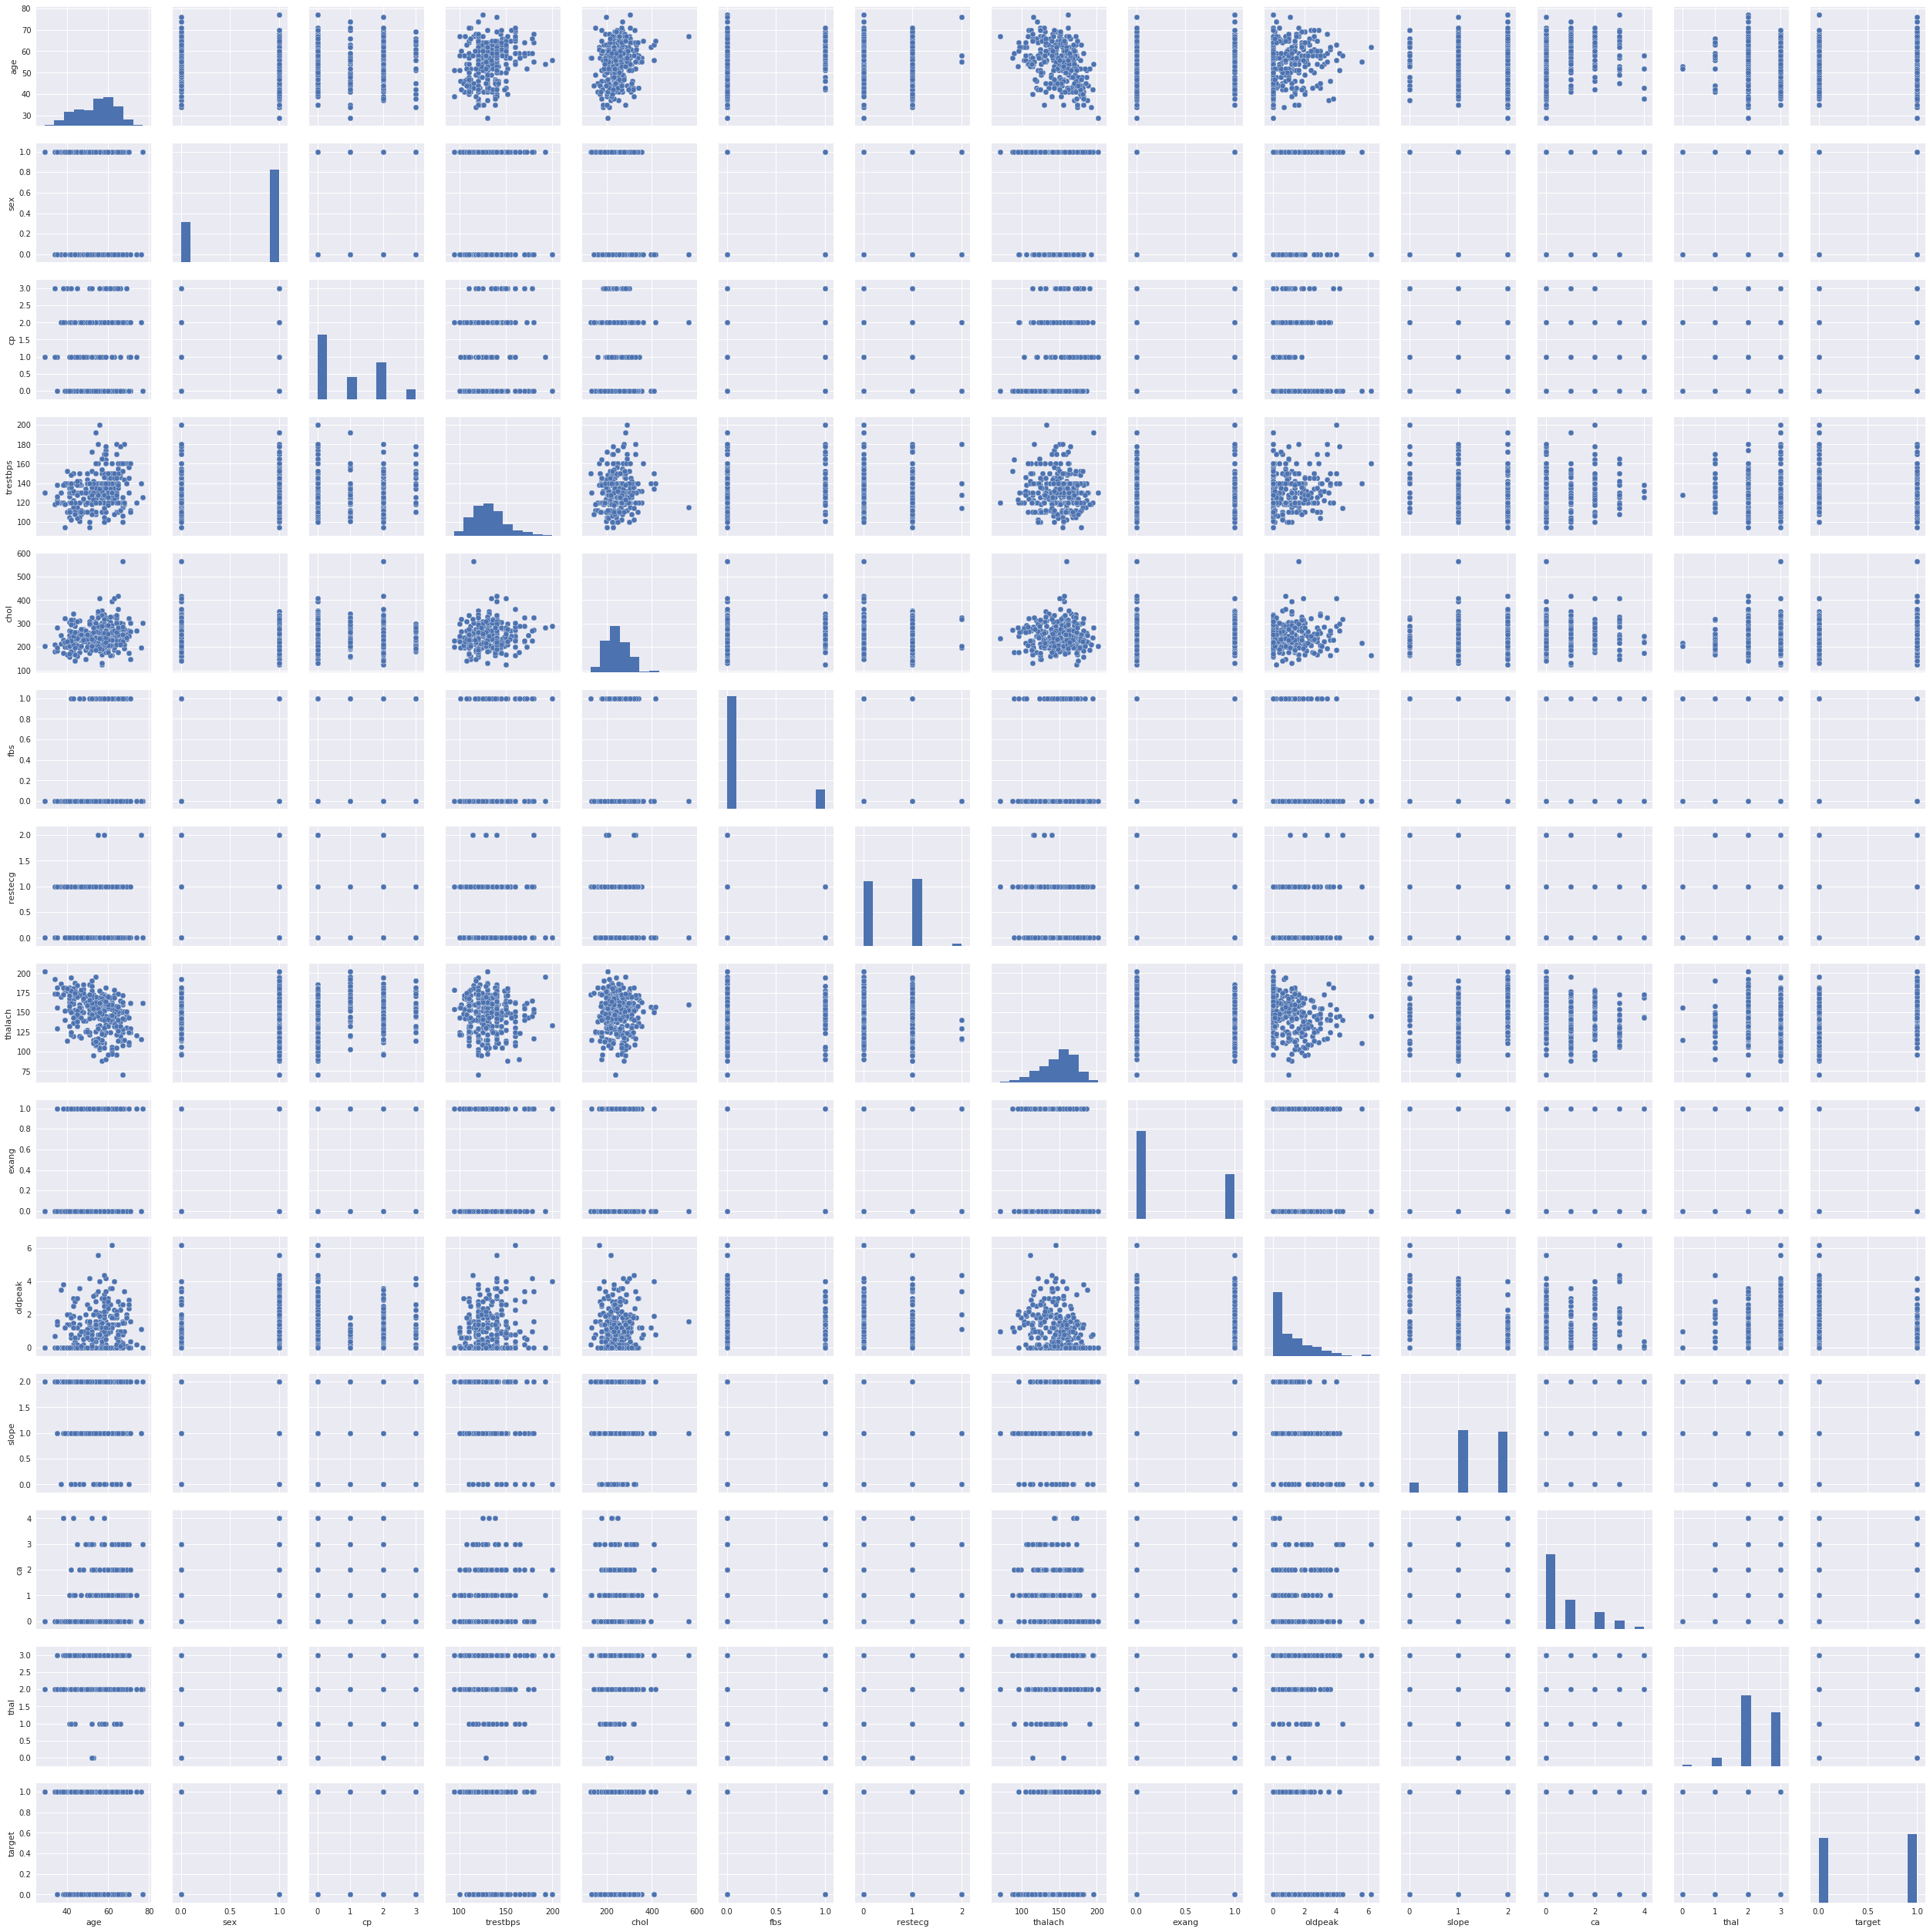

In [29]:
#scatter plot untuk semua variabel data
import seaborn as sns
sns.set()
sns.pairplot(data)

Tetapi tidak semua data dapat divisualisasikan dengan scatter plot. Seperti contoh hasil visualisasi di atas, terlihat hanya beberapa pasang variabel saja yang dapat menggambarkan persebaran data. Hal tersebut dikarenakan oleh nilai yang ada di beberapa variabel dalam dataset bukan merupakan nilai kontinu/terukur, contohnya adalah variabel target, dimana variabel tersebut berisikan nilai kategorikal berupa angka 1 jika menderita penyakit jantung dan angka 0 jika tidak menderita penyakit jantung. Oleh karena itu, <b> scatter plot hanya akan diaplikasikan untuk melihat persebaran dan korelasi antara dua variabel dalam dataset yang memiliki nilai terukur, yaitu variabel : age, trestbps, chol, thalach, dan oldpeak </b>.

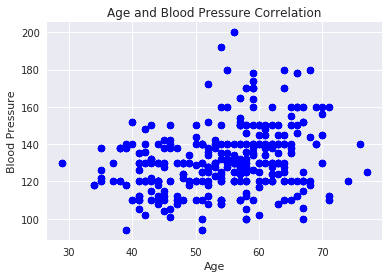

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data.age, data.trestbps,  color='blue')
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.title("Age and Blood Pressure Correlation")
plt.show()

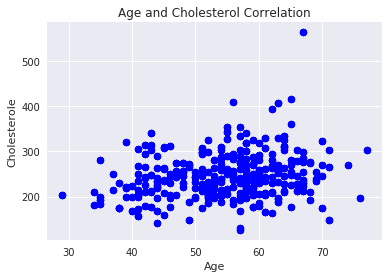

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data.age, data.chol,  color='blue')
plt.xlabel("Age")
plt.ylabel("Cholesterole")
plt.title("Age and Cholesterol Correlation")
plt.show()

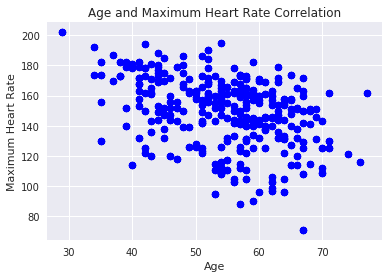

In [6]:
import matplotlib.pyplot as plt
plt.scatter(data.age, data.thalach,  color='blue')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Age and Maximum Heart Rate Correlation")
plt.show()

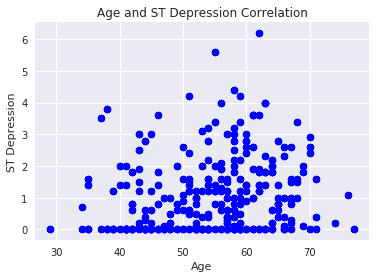

In [7]:
import matplotlib.pyplot as plt
plt.scatter(data.age, data.oldpeak,  color='blue')
plt.xlabel("Age")
plt.ylabel("ST Depression")
plt.title("Age and ST Depression Correlation")
plt.show()

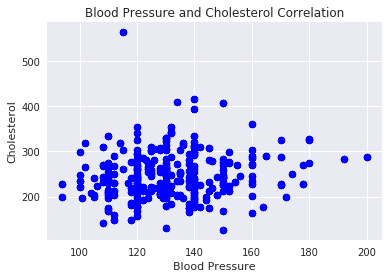

In [8]:
import matplotlib.pyplot as plt
plt.scatter(data.trestbps, data.chol,  color='blue')
plt.xlabel("Blood Pressure")
plt.ylabel("Cholesterol")
plt.title("Blood Pressure and Cholesterol Correlation")
plt.show()

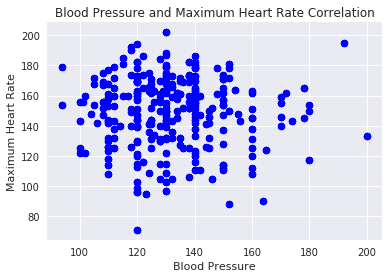

In [9]:
import matplotlib.pyplot as plt
plt.scatter(data.trestbps, data.thalach,  color='blue')
plt.xlabel("Blood Pressure")
plt.ylabel("Maximum Heart Rate")
plt.title("Blood Pressure and Maximum Heart Rate Correlation")
plt.show()

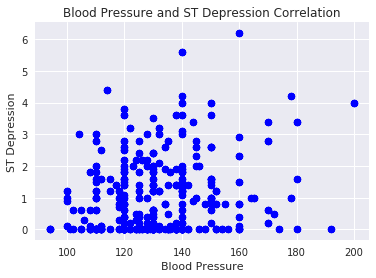

In [10]:
import matplotlib.pyplot as plt
plt.scatter(data.trestbps, data.oldpeak,  color='blue')
plt.xlabel("Blood Pressure")
plt.ylabel("ST Depression")
plt.title("Blood Pressure and ST Depression Correlation")
plt.show()

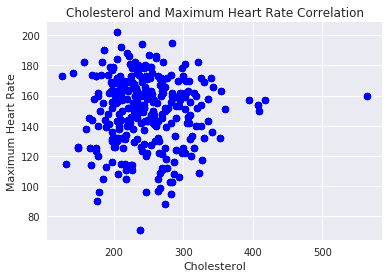

In [11]:
import matplotlib.pyplot as plt
plt.scatter(data.chol, data.thalach,  color='blue')
plt.xlabel("Cholesterol")
plt.ylabel("Maximum Heart Rate")
plt.title("Cholesterol and Maximum Heart Rate Correlation")
plt.show()

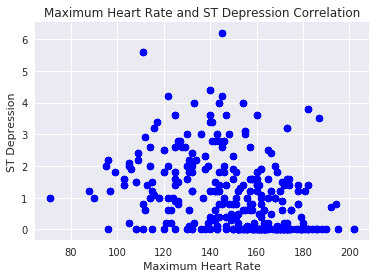

In [12]:
import matplotlib.pyplot as plt
plt.scatter(data.thalach, data.oldpeak,  color='blue')
plt.xlabel("Maximum Heart Rate")
plt.ylabel("ST Depression")
plt.title("Maximum Heart Rate and ST Depression Correlation")
plt.show()

### 2. Pasangan features manakah yang sekiranya berkorelasi ?

Dataset yang digunakan untuk project ini sudah terdeskripsi dengan jelas bahwa variabel dependen dalam dataset adalah variabel target, sedangkan variabel lainnya merupakan variabel independen yang berpengaruh terhadap variabel target. Namun, sayangnya korelasi antara variabel target dengan setiap variabel independennya tidak dapat divisualisikan dengan scatter plot karena nilai variabel target bukanlah nilai terukur. Sehingga kita akan menganalisis apakah setiap variabel independen yang ada dalam dataset akan memiliki dependency satu sama lain.

Untuk mengecek hal tersebut, kita bisa melakukan analisis regresi terhadap pasangan variabel yang memiliki kecenderungan korelasi. Dari 9 scatter plot di atas, pasangan variabel yang diduga memiliki korelasi adalah variabel <b> age </b> dan <b> thalach </b>. Dikarenakan hasil scatter plot untuk variabel age dan thalach terlihat memiliki kecenderungan pola regresi dibandingkan scatter plot pasangan variabel yang lain yang lebih cenderung mengelompok atau justru terlalu menyebar.

### 3. Statistik deskriptif untuk features yang akan dianalisis regresi

Sebelum melakukan analisis regresi, terlebih dahulu kita melihat statistik deskriptif dari masing-masing feature yang akan digunakan, seperti nilai minimum, maksimum, mean, dan standard deviasi dari feature tersebut.

In [13]:
data1 = data[['age','thalach',]]

data1.describe()

,age,thalach
count,1025.000000,1025.000000
mean,54.434146,149.114146
std,9.072290,23.005724
min,29.000000,71.000000
25%,48.000000,132.000000
50%,56.000000,152.000000
75%,61.000000,166.000000
max,77.000000,202.000000


Kemudian, untuk mengetahui sebaran data yang ada pada masing-masing feature, maka dibuatlah visualisasi dalam bentuk histogram dan boxplot

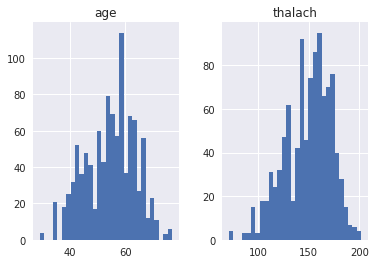

In [14]:
viz = data1
viz.hist(bins = 30)
plt.show()

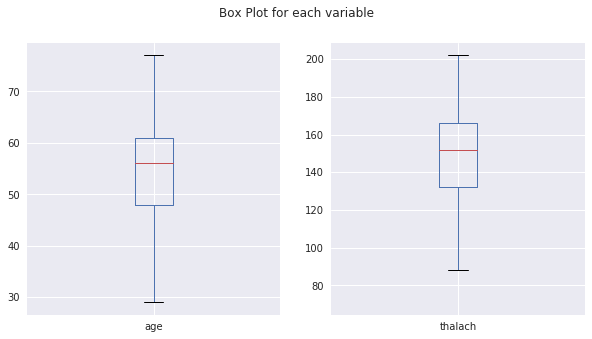

In [15]:
data1.plot(kind='box', subplots=True, layout=(1,2), 
           sharex=False, sharey=False, figsize=(10,5),
           title='Box Plot for each variable')
plt.show()

Dari hasil visualisasi histogram dan boxplot di atas, diketahui bahwa range sebaran data variabel <b> age </b> berada pada usia 0 sampai dengan diatas 70 tahun dan range sebaran data variabel <b> thalach </b> berada pada kisaran 80 sampai dengan 200 BPM. Selain itu, terlihat adanya satu outlier pada variabel <b> thalach </b>, dimana nilainya adalah kurang dari 80 BPM. Sehingga outlier tersebut harus dihilangkan terlebih dahulu agar data memiliki range yang seimbang sesuai dengan rata-rata dan standard deviasi yang dimiliki oleh variabel tersebut.

In [16]:
# Cleaning Outlier
import numpy as np

meanAge = data['age'].mean()
stdAge = data['age'].std()
meanMaxHeartRate = data['thalach'].mean()
stdMaxHeartRate = data['thalach'].std()

dataClean = data[(np.abs((data['age']-meanAge)/stdAge) <= 3)
                 & (np.abs((data['thalach']-meanMaxHeartRate)/stdMaxHeartRate) <= 3)]

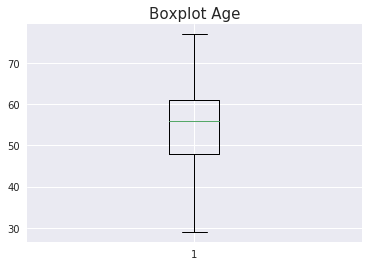

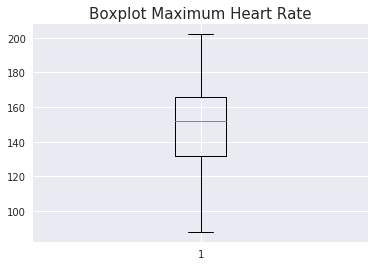

In [17]:
#Boxplot After Cleaning
plt.boxplot(dataClean.age)
plt.title("Boxplot Age",fontsize = 15)
plt.show()

plt.boxplot(dataClean.thalach)
plt.title("Boxplot Maximum Heart Rate",fontsize = 15)
plt.show()


Terlihat dalam boxplot di atas bahwa outlier pada variabel <b> thalach </b> sudah hilang setelah dilakukan proses cleaning. Setelah masing-masing variabel sudah bersih dari outlier, maka kita akan melihat korelasi persebaran data antar variabel <b> age </b> dan <b> thalach </b> setelah proses cleaning dibandingkan dengan sebelum cleaning yang divisualisasikan menggunakan scatter plot.

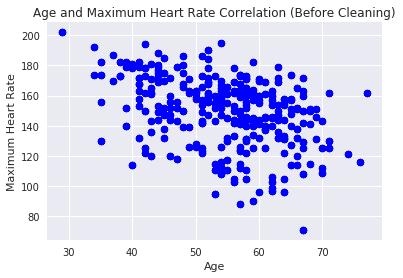

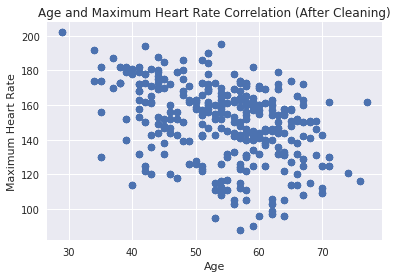

In [18]:
import matplotlib.pyplot as plt
plt.scatter(data.age, data.thalach,  color='blue')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Age and Maximum Heart Rate Correlation (Before Cleaning)")
plt.show()

# Korelasi Persebaran Data Age-Maximum Heart Rate hasil Cleaning
plt.scatter(dataClean.age, dataClean.thalach)
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Age and Maximum Heart Rate Correlation (After Cleaning)")
plt.show()

Dari perbandingan scatter plot antara <b> Age dan Maximum Heart Rate </b> sebelum dan sesudah dilakukan cleaning, korelasi persebaran antar variabel tidak banyak berubah dan tidak merusak pola regresi yang sekiranya dimiliki oleh pasangan variabel tersebut.

### 4. Analisis model regresi (linear atau nonlinear) terhadap pasangan feature

Untuk membuat model regresi, maka kedua variabel harus berada pada range data yang sama agar dapat membentuk suatu kurva. Maka dari itu, normalisasi diberlakukan untuk kedua variabel yang akan dibuat model regresi. Hasil dari normalisasi ini adalah kedua data berada pada range 0 sampai dengan 1. 

In [19]:
# Lets normalize our data
data_normalize = pd.DataFrame(dataClean)

data_normalize['age'] = data_normalize.age/max(data_normalize.age)
data_normalize['trestbps'] = data_normalize.trestbps/max(data_normalize.trestbps)
data_normalize['chol'] = data_normalize.chol/max(data_normalize.chol)
data_normalize['thalach'] = data_normalize.thalach/max(data_normalize.thalach)
data_normalize['oldpeak'] = data_normalize.oldpeak/max(data_normalize.oldpeak)

data_normalize.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.675325,1,0,0.625,0.375887,0,1,0.831683,0,0.161290,2,2,3,0
1,0.688312,1,0,0.700,0.359929,1,0,0.767327,1,0.500000,0,0,3,0
2,0.909091,1,0,0.725,0.308511,0,1,0.618812,1,0.419355,0,0,3,0
3,0.792208,1,0,0.740,0.359929,0,1,0.797030,0,0.000000,2,1,3,0
4,0.805195,0,0,0.690,0.521277,1,1,0.524752,0,0.306452,1,3,2,0


Setelah data berada pada range yang sama, maka kita akan mencoba menerapkan beberapa model regresi pada korelasi antara variabel age dan thalach. Beberapa model regresi yang akan diterapkan adalah <b> regresi linear, sigmoid, eksponensial, dan polinomial </b>. Penerapan beberapa model regresi ini digunakan untuk menentukan manakah fungsi kurva yang cocok untuk data tersebut. Berikut ini adalah function untuk beberapa model regresi yang akan diterapkan :

In [20]:
import numpy as np

def lnr (x, Beta_1, Beta_2):
     y = Beta_1+Beta_2*x
     return y
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp (-Beta_1*(x-Beta_2)))
     return y
def expo (x, Beta_1, Beta_2):
     y = Beta_1*np.exp(Beta_2*x)
     return y
def polinomial (x, Beta_1, Beta_2, Beta_3, Beta_4):
     y = Beta_1+Beta_2*x+Beta_3*x**2+Beta_4*x**3
     return y

#### Model Regresi : Age - Maximum Heart Rate

Sebagai masukan pada fungsi regresi yang akan diterapkan, maka kita perlu mendefinisikan nilai x dan y nya. Variabel data age digunakan sebagai sumbu x, dan variabel thalach digunakan sebagai sumbu y.

In [21]:
#define x dan y
xdata, ydata = (data_normalize['age'].values, data_normalize['thalach'].values)

In [22]:
from scipy.optimize import curve_fit
popt0, pcov0 = curve_fit(lnr, xdata, ydata, maxfev=20000)
popt1, pcov1 = curve_fit(sigmoid, xdata, ydata, maxfev=20000)
popt2, pcov2 = curve_fit(expo, xdata, ydata, maxfev=20000)
popt3, pcov3 = curve_fit(polinomial, xdata, ydata, maxfev=20000)

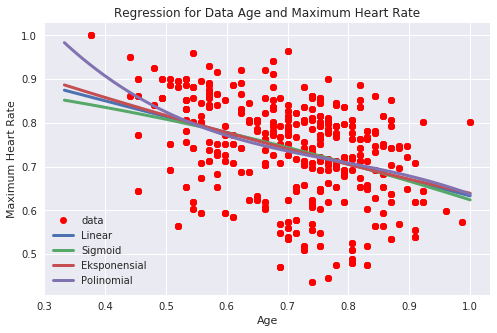

In [23]:
x = np.linspace(7, 21, 100)
x = x/max(x)
plt.figure(figsize=(8,5))
y0 = lnr(x, *popt0)
y1 = sigmoid(x, *popt1)
y2 = expo(x, *popt2)
y3 = polinomial(x, *popt3)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y0, linewidth=3.0, label='Linear')
plt.plot(x,y1, linewidth=3.0, label='Sigmoid')
plt.plot(x,y2, linewidth=3.0, label='Eksponensial')
plt.plot(x,y3, linewidth=3.0, label='Polinomial')
plt.legend(loc='best')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Regression for Data Age and Maximum Heart Rate")
plt.show()

Untuk menguji model regresi yang dibuat, maka kita perlu melakukan validasi model dengan membentuk data train dan data test. Validasi yang akan dilakukan akan membagi komposisi keseluruhan data age dan thalach menjadi <b> 80% digunakan sebagai data train dan 20% digunakan sebagai data test </b>.

In [24]:
msk = np.random.rand(len(data_normalize)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

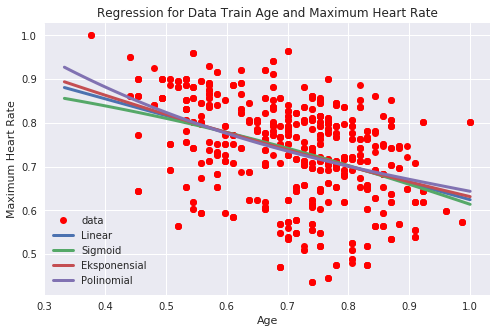

In [25]:
# build the model using train set
popt0, pcov0 = curve_fit(lnr, train_x, train_y, maxfev=20000)
popt1, pcov1 = curve_fit(sigmoid, train_x, train_y, maxfev=20000)
popt2, pcov2 = curve_fit(expo, train_x, train_y, maxfev=20000)
popt3, pcov3 = curve_fit(polinomial, train_x, train_y, maxfev=20000)

#regression graphic for data train
x = np.linspace(7, 21, 100)
x = x/max(x)
plt.figure(figsize=(8,5))
y0 = lnr(x, *popt0)
y1 = sigmoid(x, *popt1)
y2 = expo(x, *popt2)
y3 = polinomial(x, *popt3)
plt.plot(train_x, train_y, 'ro', label='data')
plt.plot(x,y0, linewidth=3.0, label='Linear')
plt.plot(x,y1, linewidth=3.0, label='Sigmoid')
plt.plot(x,y2, linewidth=3.0, label='Eksponensial')
plt.plot(x,y3, linewidth=3.0, label='Polinomial')
plt.legend(loc='best')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Regression for Data Train Age and Maximum Heart Rate")
plt.show()

In [26]:
# predict using test set
y_pred0 = lnr(test_x, *popt0)
y_pred1 = sigmoid(test_x, *popt1)
y_pred2 = expo(test_x, *popt2)
y_pred3 = polinomial(test_x, *popt3)

# evaluation
print("------ Model Linear ------")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred0 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred0 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_pred0 , test_y) )

print("------ Model Sigmoid ------")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred1 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred1 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_pred1 , test_y) )

print("------ Model Eksponensial ------")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred2 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_pred2 , test_y) )

print("------ Model Polynomial ------")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred3 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_pred3 , test_y) )

------ Model Linear ------
Mean absolute error: 0.09
Residual sum of squares (MSE): 0.01
R2-score: -4.59
------ Model Sigmoid ------
Mean absolute error: 0.09
Residual sum of squares (MSE): 0.01
R2-score: -5.02
------ Model Eksponensial ------
Mean absolute error: 0.09
Residual sum of squares (MSE): 0.01
R2-score: -4.43
------ Model Polynomial ------
Mean absolute error: 0.09
Residual sum of squares (MSE): 0.01
R2-score: -4.24


Dari beberapa kali percobaan yang dilakukan, model regresi terbaik yang didapatkan adalah model eksponensial atau model polynomial. <b> Namun nilai R2-score yang didapatkan selalu minus, sehingga dapat ditarik kesimpulan bahwa model regresi ini memang tidak cocok digunakan untuk mendeteksi adanya dependency antar variabel </b>. Hal tersebut menandakan bahwa <b> variabel age dan thalach tidak saling bergantung satu sama lain </b>, sehingga tidak ada efek kausalitas diantara korelasi keduanya.

### 5. Analisis Classification

Di awal sudah dijelaskan bahwa dalam dataset yang digunakan, variabel target bergantung pada setiap variabel lain pada data. Sehingga variabel-variabel independen tersebut dapat digunakan untuk <b> melakukan prediksi bahwa seorang pasien menderita penyakit jantung atau tidak </b>. Prediksi yang akan dilakukan akan menggunakan metode classification, dimana target prediksi nya adalah variabel <b> target </b> dan feature-feature yang digunakan untuk prediksi nya adalah semua variabel dataset dari kolom 1-13.

In [53]:
#define feature and target for classification
x = data_normalize.drop(columns=['target'], axis=1).values
y = data_normalize['target'].values

akurasi = {}

Prediksi yang akan dilakukan akan menggunakan beberapa model classification, yaitu :
    - Decision Tree
    - Random Forest
    - KNN
    - Logistic Regression
    - LDA
    - Gaussian Naive Bayes 
    - SVM
Untuk melakukan validasi terhadap model mana yang paling baik digunakan dalam memprediksi, maka dataset akan dibagi menjadi data train dan data test. Menggunakan bantuan library train_test_split, data akan secara default dipisahkan menjadi 75% data train dan 25% data test.

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b> Model Decission Tree </b>

In [67]:
## Model using Decision Tree
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier().fit(X_train, y_train)

acc = DecisionTree.score(X_test, y_test)*100
akurasi['Decision Tree'] = acc
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(DecisionTree.score(X_train, y_train)*100))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(acc))

Accuracy of Decision Tree classifier on training set: 100.00
Accuracy of Decision Tree classifier on test set: 97.27


<b> Model Random Forest </b>

In [56]:
## Model using Random Forest
from sklearn.ensemble import RandomForestClassifier
RandForest = RandomForestClassifier().fit(X_train, y_train)

acc = RandForest.score(X_test, y_test)*100
akurasi['Random Forest'] = acc
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(RandForest.score(X_train, y_train)*100))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(acc))

Accuracy of Decision Tree classifier on training set: 100.00
Accuracy of Decision Tree classifier on test set: 98.44


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<b> Model KNN </b>

In [57]:
## Model using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

acc = knn.score(X_test, y_test)*100
akurasi['KNN'] = acc
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)*100))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(acc))

Accuracy of K-NN classifier on training set: 93.33
Accuracy of K-NN classifier on test set: 82.03


<b> Model Logistic Regression </b>

In [58]:
## Model using Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

acc = logreg.score(X_test, y_test)*100
akurasi['Logistic Regression'] = acc
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)*100))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(acc))

Accuracy of Logistic regression classifier on training set: 85.10
Accuracy of Logistic regression classifier on test set: 81.25


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<b> Model LDA </b>

In [59]:
## Model using Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

acc = lda.score(X_test, y_test)*100
akurasi['LDA'] = acc
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)*100))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(acc))

Accuracy of LDA classifier on training set: 84.58
Accuracy of LDA classifier on test set: 79.30


<b> Model Gaussian Naive Bayes </b>

In [60]:
## Model using Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

acc = gnb.score(X_test, y_test)*100
akurasi['Gaussian Naive Bayes'] = acc
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)*100))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(acc))

Accuracy of GNB classifier on training set: 83.01
Accuracy of GNB classifier on test set: 76.56


<b> Model SVM </b>

In [61]:
## Model using SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

acc = svm.score(X_test, y_test)*100
akurasi['SVM'] = acc
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)*100))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(acc))

Accuracy of SVM classifier on training set: 83.66
Accuracy of SVM classifier on test set: 78.52


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


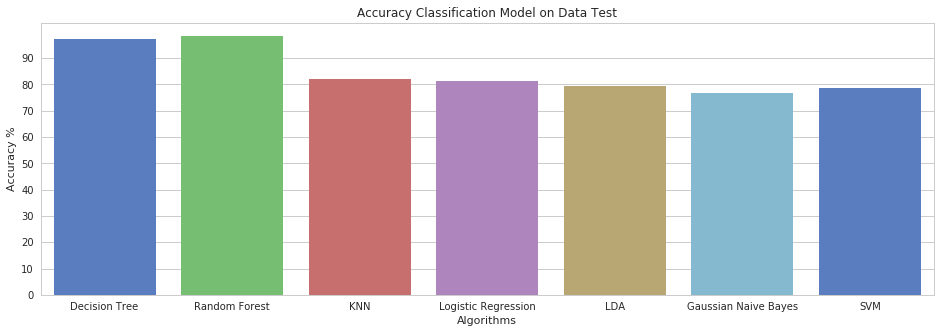

In [62]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(akurasi.keys()), y=list(akurasi.values()), palette= sns.color_palette("muted", n_colors=7))
plt.title("Accuracy Classification Model on Data Test")
plt.show()

Berdasarkan bar chart di atas, dapat disimpulkan bahwa model terbaik untuk yang dapat digunakan untuk melakukan prediksi penyakit jantung pada pasien adalah <b> Model Random Forest </b> dengan accuracy 98.44%.

In [63]:
#Predicted Value
y_pred_DT = DecisionTree.predict(X_test)
y_pred_RF = RandForest.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_lda = lda.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
y_pred_svm = svm.predict(X_test)

Untuk mengetahui berapa banyak data yang dapat terprediksi dengan benar, maka akan dibuat confussion matrix terhadap hasil prediksi nya.

In [64]:
#Confusion matrix for each algorithm
from sklearn.metrics import confusion_matrix

cm_DT = confusion_matrix(y_test,y_pred_DT)
cm_RF = confusion_matrix(y_test,y_pred_RF)
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_logreg = confusion_matrix(y_test,y_pred_logreg)
cm_lda = confusion_matrix(y_test,y_pred_lda)
cm_gnb = confusion_matrix(y_test,y_pred_gnb)
cm_svm = confusion_matrix(y_test,y_pred_svm)

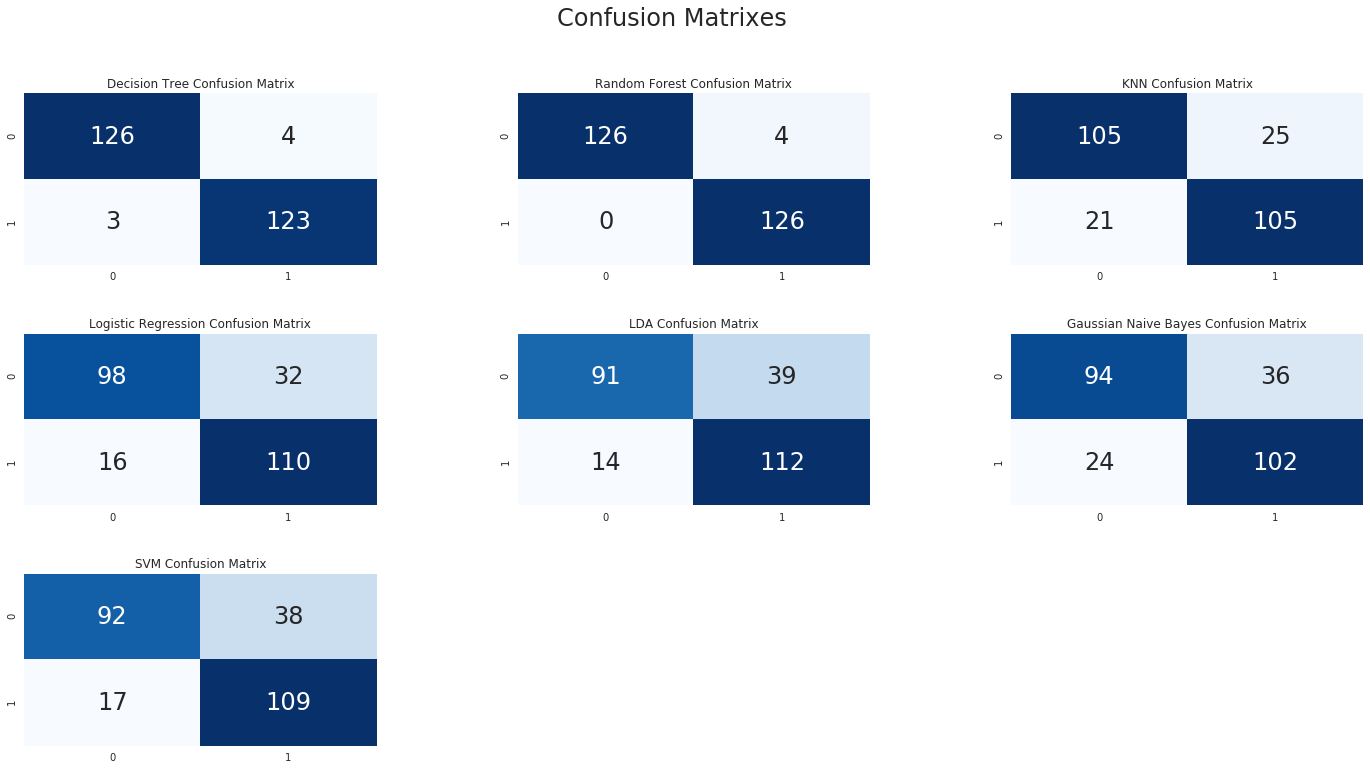

In [65]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_DT,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_RF,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_logreg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("LDA Confusion Matrix")
sns.heatmap(cm_lda,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Gaussian Naive Bayes Confusion Matrix")
sns.heatmap(cm_gnb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("SVM Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Confussion matrix diatas berisikan beberapa informasi nilai, yaitu :
    - TP (True Positive)
    - FP (False Positive)
    - TN (True Negative)
    - FN (False Negative)
Dataset terdiri dari 126 data berlabel 0 dan 134 data berlabel 1. Model Random Forest tepat memprediksi 126 data berlabel 1 dan 126 data berlabel 0. Sehingga model tersebut cukup relevan digunakan untuk melakukan prediksi penyakit jantung pada pasien.